<a href="https://colab.research.google.com/github/lkostenko/python_da_homeworks/blob/main/Additional_hw_6_Pandas_%2B_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Усі імпорти рекомендую розташувати отут зверху для зручності.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/курс Аналітик/Модуль 4. Візуалізація даних/data/ecommerce_data_1.csv'

1.Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.

In [4]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')

2.Виведіть перші три записи в завантаженому наборі даних

In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


3.Перейменуйте колонки, для цього просто запустіть код нижче та зверніть увагу, як ми перейменували колонки. Перейменування тут - просто для зручності.

In [6]:
df.columns = df.columns.str.lower()


4.Виведіть поточні назви колонок.

In [7]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

# Базове розуміння даних

5.Виведіть кількість колонок і стовпців в наборі даних.

In [8]:
df.shape

(541909, 8)

6.Виведіть типи даних в кожній з колонок. Будь-яким способом, але аби для Вас як для дослідника стало зрозуміло, з якими даними ми зараз маємо справу.

In [9]:
df.dtypes

,0
invoiceno,object
stockcode,object
description,object
quantity,int64
invoicedate,object
unitprice,float64
customerid,float64
country,object


Очікуваний результат (один з):

![](https://drive.google.com/uc?export=view&id=1Pc2cam8vdZeEP4xLXlsoevOTt4O_KI4R)

7.Виведіть кількість пустих (null) значень в кожній з колонок за спаданням цієї кількості.

In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
customerid,135080
description,1454
invoiceno,0
stockcode,0
quantity,0
invoicedate,0
unitprice,0
country,0


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1IXVowBSH9-LtCR8gkMXcQHXWPinujkF5)

### Конвертація дат

8.Конвертуйте дату колонки `invoicedate` у тип `datetime64[ns]`.

In [11]:
import datetime
df.invoicedate = pd.to_datetime(df.invoicedate)

Запустіть код нижче:

In [12]:
df.invoicedate[:2]

,invoicedate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1ds5CwdM5D50hlnk1zsDw7YT-aG_KErIg)

# Чистка даних

### Прибираємо пусті значення (NA)

9.Приберіть усі пусті значення з набору даних `df` і запишіть результат у нову змінну `df_new`.

In [13]:
df_new = df.dropna()

10.Виведіть кількість колонок і рядків в `df_new`.

In [14]:
df_new.shape

(406829, 8)

11.Виведіть, який відсоток (від 0 до 100%) рядків ми видалили з `df`, коли прибрали пусті значення? Округліть результат до цілих відсотків.

In [15]:
print(f"{round((len(df) - len(df_new)) / len(df) * 100)}%")


25%


Очікуваний результат: `25%`

### Приберемо негативні значення `quantity`

12.Виведіть мінімальне, максимальне і середнє значення колонки `quantity`. Найкраще згадати, як це зробити одною командою, що дозволяє "описати" колонки в датафреймі :)

In [16]:
df_new.quantity.describe()

,quantity
count,406829.000000
mean,12.061303
std,248.693370
min,-80995.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,80995.000000


13.Скажімо, нас не цікавлять записи з негативними quantity (бо це поверненння).   
Приберіть всі рядки, де `quantity` менше 0 з набора даних `df_new` і запишіть в той самий набір даних `df_new`.

In [17]:
df_new = df_new[df_new.quantity > 0]
df_new.quantity.describe()

,quantity
count,397924.000000
mean,13.021823
std,180.420210
min,1.000000
25%,2.000000
50%,6.000000
75%,12.000000
max,80995.000000


# Обробка даних

### Зміна типу даних `custid`

14.Ідентифікатор клієнта має мати тип "рядок" для простоти роботи з цією колонкою. Бо інакше пандас буде інтерпретувати цю колонку як число - а це логічно не правильно.
Перетворіть тип даних колонки `custid`  спочатку на int, а потім на рядок. Або можете зробити ці перетворення в одній функції (лямбді).

In [18]:
df_new.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [19]:
df_new['customerid'] = df_new.customerid.astype(int).astype(str)


Запустіть код нижче:

In [20]:
df_new['customerid'][:3]

,customerid
0,17850
1,17850
2,17850


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1V5Mn0OC6hD-OmXGswe2N8CsIxsuBuoPE)

### Додамо колонку `amountspent`

15.Додайте в `df_new` колонку `amountspent`, яка є добутком колонок `quantity` і `unitprice`.

In [21]:
df_new['amountspent'] = df_new.quantity * df_new.unitprice
df_new.amountspent

,amountspent
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


### Додавання колонок `month`, `day`, `hour`, `yearmonth` для інвойса.

16.Використовуючи колонку invoicedate та те, що вона в нас вже має тип datetime, створіть 4 нових колонки в даних:
- `yearmonth` - рік і місяць інвойсу разом у форматі "2010-12" - тобто 12 місяць 2010го року і тип цієї колонки має бути датою (підказка: просто робимо для колонки`invoicedate` `dt.to_period('M')` для того аби таке отримати)
- `month` - місяць інвойсу
- `day` - день тижня інвойсу (понеділок - це перший, неділя - останній)
- `hour` - година інвойсу

Зробіть також так, аби `yearmonth` була третьою (за рахунком) колонкою в датафреймі, `month` - четвертою, `day` - пʼятою, `hour` - шостою.

In [22]:
df_new['yearmonth'] = df_new.invoicedate.dt.to_period('M')
df_new['month'] = pd.to_datetime(df.invoicedate).dt.month
df_new['day'] = df_new.invoicedate.dt.dayofweek + 1
df_new['hour'] = pd.to_datetime(df.invoicedate).dt.hour


In [23]:
df_new = df_new[['invoiceno', 'stockcode', 'yearmonth', 'month', 'day', 'hour', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'amountspent']]

Запустіть код нижче:

In [24]:
df_new.head(3)

,invoiceno,stockcode,yearmonth,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amountspent
0,536365,85123A,2010-12,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010-12,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010-12,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [25]:
df_new.dtypes

,0
invoiceno,object
stockcode,object
yearmonth,period[M]
month,int32
day,int32
hour,int32
description,object
quantity,int64
invoicedate,datetime64[ns]
unitprice,float64


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1Wn4tNmFOvqHk0VLpfwASKWiPpjJ5_Jgt)

![](https://drive.google.com/uc?export=view&id=1fYm7_uYhk14J51YkqJLtsQo_aqxz6jGZ)

# Базовий Exploratory Data Analysis (EDA)

17.Побудуйте з допомогою методів візуалізації `pandas` датафрейму (ті що з категорії `df.plot()`) стовпчастий графік кількості унікальних продажів помісячно за весь наявний період в даних. Зробіть так, аби підписи дат були нахилені під кутом 45 градусів для зручнішого перегляду.
Кількість унікальних продажів - це кількість унікальних інвойсів.

Підказка: для візуалізації нам спочатку треба агреугувати дані помісячно.

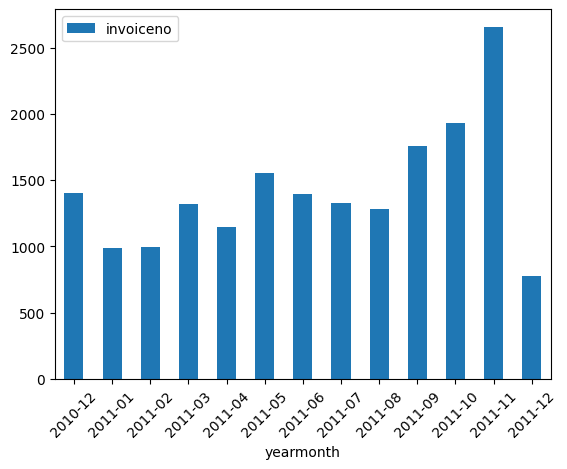

In [26]:
df_new.groupby("yearmonth")["invoiceno"].nunique().plot.bar()
plt.xticks(rotation=45)
plt.legend(["invoiceno"]);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1xbjqTCroVKLgdRxFGA9LG1T6Xx9eWlO1)

18.Побудуйте стовпчастий графік кількості унікальних інвойсів для топ 10 клієнтів за цим показником.

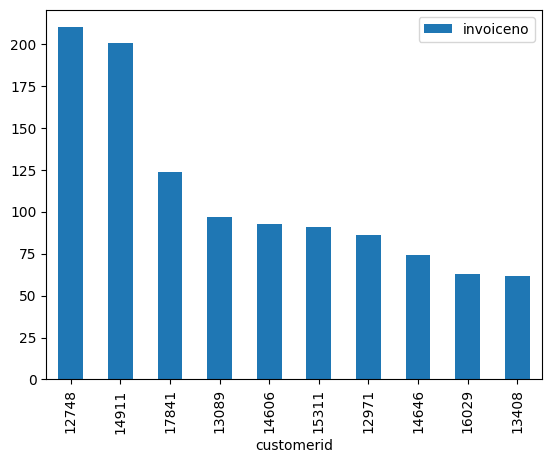

In [27]:
df_new.groupby("customerid")["invoiceno"].nunique().nlargest(10).plot.bar()
plt.legend(["invoiceno"]);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1zGhcVaPZBqcKj8YG_P-0pOzGVAV8cJNr)

19.Створіть новий датафрейм, що містить сумарний `amountspent` по кожному ідентифікатору клієнта.

In [28]:
df_new.head()

,invoiceno,stockcode,yearmonth,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amountspent
0,536365,85123A,2010-12,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010-12,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010-12,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010-12,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010-12,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [29]:
df_new.groupby("customerid")["amountspent"].sum()

,amountspent
customerid,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


20.Використовуючи датафрейм з попереднього пункту, виведіть, якими є 10, 25, 50, 75 і 90 персентилі сумарних витрат клієнтів за розглянутий період:

In [30]:
df_new.groupby("customerid")["amountspent"].sum().describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,amountspent
count,4339.000000
mean,2053.793018
std,8988.248381
min,0.000000
10%,156.566000
25%,307.245000
50%,674.450000
75%,1661.640000
90%,3646.164000
max,280206.020000


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16h2lsEwR3GooNkzH0JLfJHRk5oyG3ZqE)

21.Скільки унікальних клієнтів мають сумарні витрати вищі, ніж 90-тий персентиль в попередньому завдані?

In [31]:
((df_new.groupby("customerid")["amountspent"].sum()) > 3646.164).sum()

434

22.Виведіть середню суму покупок в мережі по дням тижня. Дні тижня мають йти в звичному порядку Monday, Tuesday і т.д.

In [32]:
day_map = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"}

In [33]:
amountspent_day = df_new.groupby("day")["amountspent"].mean()
amountspent_day.index = amountspent_day.index.map(day_map)
amountspent_day

,amountspent
day,
Monday,21.065755
Tuesday,25.582686
Wednesday,23.056790
Thursday,24.694687
Friday,27.098468
Sunday,12.624679


## Дослідимо продажі на суму 0 умовних одиниць

23.Можна було помітити вище, що в нас є продажі на суму 0. Дослідимо їх. Створіть новий датафрейм з тільки такими продажами.

In [34]:
df_new_zero_amountspent = df_new[df_new["amountspent"] == 0]
df_new_zero_amountspent.head()

,invoiceno,stockcode,yearmonth,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amountspent
9302,537197,22841,2010-12,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,2010-12,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,2010-12,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
47068,540372,22090,2011-01,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
47070,540372,22553,2011-01,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


### Динаміка продажів на суму 0

24.Зобразіть у вигляді стовпчастої діаграми помісячну динаміку продажів на суму 0.

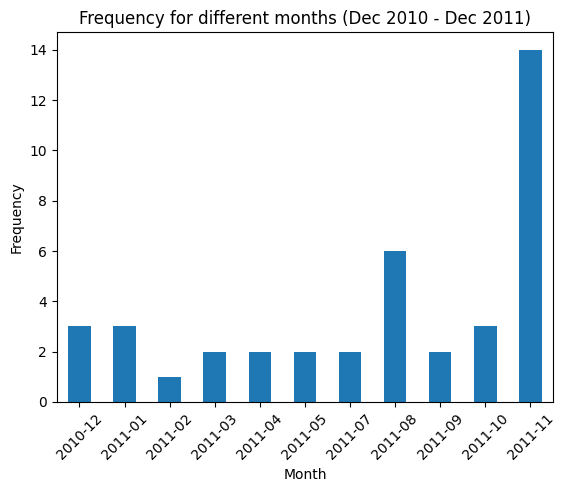

In [35]:
df_new_zero_amountspent.groupby("yearmonth")["amountspent"].count().plot.bar()
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Frequency for different months (Dec 2010 - Dec 2011)")
plt.xticks(rotation=45);


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RfpdWGqkOmwZ6RVUqQz-U-q3qkml5g88)

25.Згрупуйте дані за країнами та підрахуйте кількість унікальних інвойсів з сумою 0 для кожної країни. Виведіть у вигляді датафрейму.

In [38]:
df_new_zero_amountspent.groupby("country")["invoiceno"].nunique()

,invoiceno
country,
Australia,3
EIRE,2
France,1
Germany,2
Netherlands,1
Norway,1
RSA,1
Spain,1
Switzerland,1


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1N9rcWby_Umc31Q7e-1p2bCb1nCpzadoz)

Велике питання, чого магазин так багато порівняно роздавав безкоштовних товарів в UK, але така політика фірми :)

Якщо у вас ще є натхнення, пропоную задати до цих даних ще 3 своїх питання.

В який час доби здійснюється найбільше покупок?

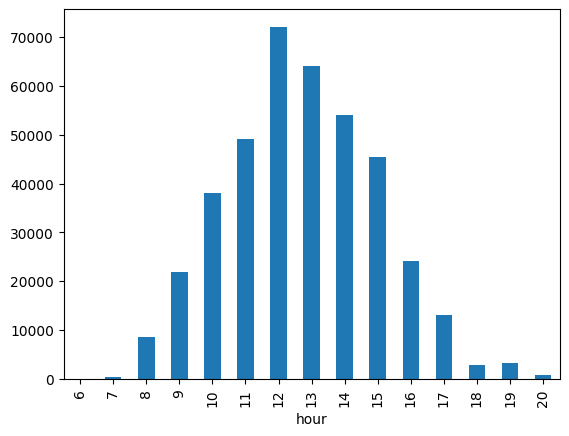

In [51]:
df_new.groupby("hour")["invoiceno"].count().plot.bar();

Перевіримо, чи змінюються пікові години покупок в будні дні та вихідні

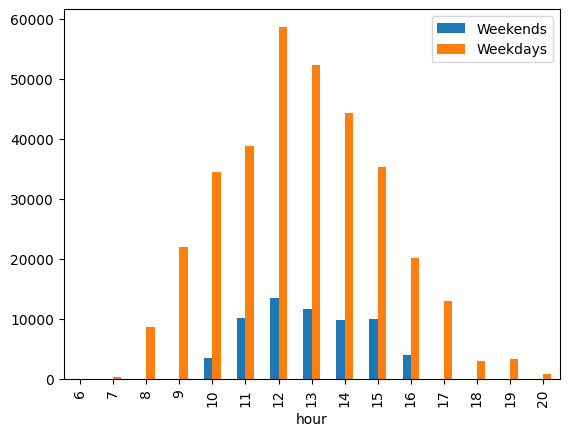

In [55]:
df_new['is_weekday'] = df_new['invoicedate'].dt.weekday < 6
df_new.groupby(['hour', 'is_weekday'])['invoiceno'].count().unstack().plot.bar()
plt.legend(["Weekends", "Weekdays"]);

**Будні дні (Weekdays):**

Активність найвища в робочі години (10:00–15:00), що може бути пов’язано з діловими операціями або покупками протягом робочого дня.
Максимум транзакцій припадає на 12:00.
Після 16:00 активність суттєво спадає.

**Вихідні (Weekends):**

Активність значно нижча порівняно з буднями.
Основний пік транзакцій також спостерігається близько 12:00–14:00.
Загалом, активність більш рівномірно розподілена у вихідні, але на значно нижчому рівні.

Визначимо найбільш продавані товари за кількістю та загальною сумою витрат:

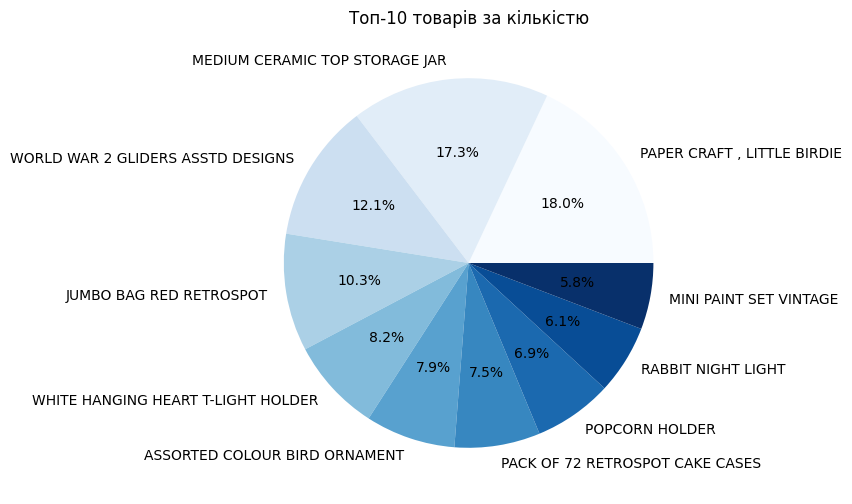

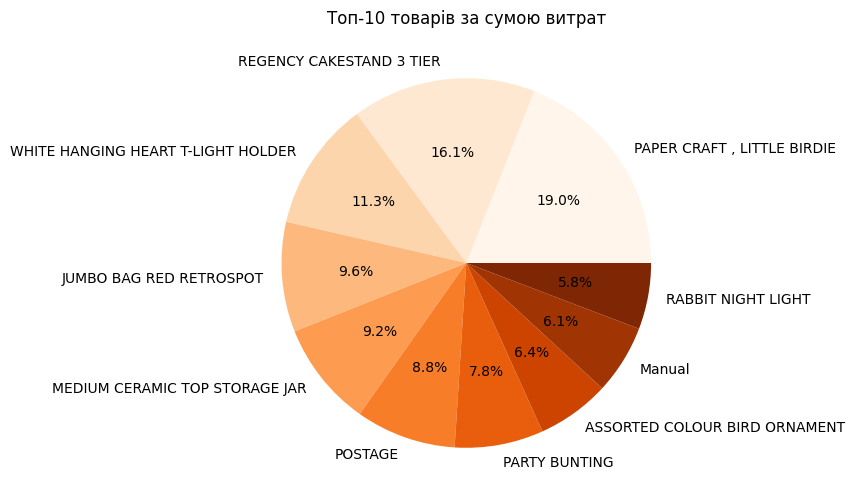

In [74]:
df_new.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10).plot.pie(
    title="Топ-10 товарів за кількістю", autopct='%1.1f%%', ylabel="", figsize=(6, 6), colormap="Blues")
plt.show()

df_new.groupby('description')['amountspent'].sum().sort_values(ascending=False).head(10).plot.pie(
    title="Топ-10 товарів за сумою витрат", autopct='%1.1f%%', ylabel="", figsize=(6, 6), colormap="Oranges")
plt.show();

**Топ-10 товарів за кількістю:**

Найпопулярнішим товаром за кількістю продажів є "PAPER CRAFT, LITTLE BIRDIE" — він складає 18.0% від загального обсягу продажів у топ-10.
Друге місце посідає "MEDIUM CERAMIC TOP STORAGE JAR" із часткою 17.3%.
Інші товари в топ-10 мають частки значно менші (менше 12%), що свідчить про те, що перші два товари значно перевершують інші за популярністю.
Останні місця займають товари з часткою в межах 6–8%.

**Топ-10 товарів за сумою витрат:**

Найбільше витрат припадає на "PAPER CRAFT, LITTLE BIRDIE" (19.0%), що підтверджує його популярність і високу середню вартість.
Друге місце займає "REGENCY CAKESTAND 3 TIER" з 16.1%, що може свідчити про його високу ціну, адже він не входить у топ-10 за кількістю.
"WHITE HANGING HEART T-LIGHT HOLDER" і "JUMBO BAG RED RETROSPOT" також присутні у двох графіках, що показує їх стабільну популярність як за кількістю, так і за витратами.
Останні товари мають частки менше 7%, що свідчить про нерівномірний розподіл витрат

Товар "PAPER CRAFT, LITTLE BIRDIE" лідирує як за кількістю, так і за сумою витрат, що свідчить про його значну популярність серед покупців.
"MEDIUM CERAMIC TOP STORAGE JAR" популярний за кількістю, але поступається іншим товарам за витратами.
Високовартісні товари:

"REGENCY CAKESTAND 3 TIER" займає високу позицію за витратами, хоча його кількість продажів не така висока, що вказує на його велику одиничну вартість.